In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

# evaluation
from sklearn.metrics import classification_report, confusion_matrix

# pipeline
from sklearn.pipeline import Pipeline

In [70]:
# Loading Dataset
df = pd.read_csv("./data/amazonReview/test.csv")
#df = pd.read_csv("./data/amazonReview/train.csv")

# Resizing the dataset, for faster computing time. A random sample from the dataset https://stackoverflow.com/questions/40986230/reduce-dataframe-size-in-pandas
df = df.sample(frac=0.1) # Get 10% of the data

In [71]:
# Getting a quick overview of the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 282165 to 237418
Data columns (total 3 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                  

,2,Great CD,"My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing ""Who was that singing ?"""
282165,1,misleading product,"this is NOT an ""ultralight"" walker... those ar..."
19625,2,Clinometer,Was a gift for my husband - per his request (s...
254348,1,disappointed,I have not yet gotten this to work. It worked ...
242169,2,Great item that works well!,I have used this groomer a couple of times and...
46007,1,Explicit!,Disappointing! This was the first Linda Lael M...


In [72]:
# Renaming columns. Inspiration from Method three: https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/
df.set_axis(['polarity', 'title', 'text'], axis='columns', inplace=True)
df.head()

,polarity,title,text
282165,1,misleading product,"this is NOT an ""ultralight"" walker... those ar..."
19625,2,Clinometer,Was a gift for my husband - per his request (s...
254348,1,disappointed,I have not yet gotten this to work. It worked ...
242169,2,Great item that works well!,I have used this groomer a couple of times and...
46007,1,Explicit!,Disappointing! This was the first Linda Lael M...


In [86]:
#Assigning the text column to X and the emotions to y. https://medium.com/codex/how-to-set-x-and-y-in-pandas-3f38584e9bed
y_col = 'polarity'
y = df[y_col]
X = df[df.columns.drop(y_col)]
X.head()

,title,text
282165,misleading product,"this is NOT an ""ultralight"" walker... those ar..."
19625,Clinometer,Was a gift for my husband - per his request (s...
254348,disappointed,I have not yet gotten this to work. It worked ...
242169,Great item that works well!,I have used this groomer a couple of times and...
46007,Explicit!,Disappointing! This was the first Linda Lael M...


In [87]:
y.head()

282165    1
19625     2
254348    1
242169    2
46007     1
Name: polarity, dtype: int64

In [88]:
# Train test splitting the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [89]:
# Using the count vectorizer https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/
vectorizer = CountVectorizer()
 
#Fitting on the X_train data
vectorizer.fit(X_train)

#Transforming both the training and test data
X_train0 = vectorizer.transform(X_train)
X_test0 = vectorizer.transform(X_test)

#Viewing the data
X_train0

<2x2 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

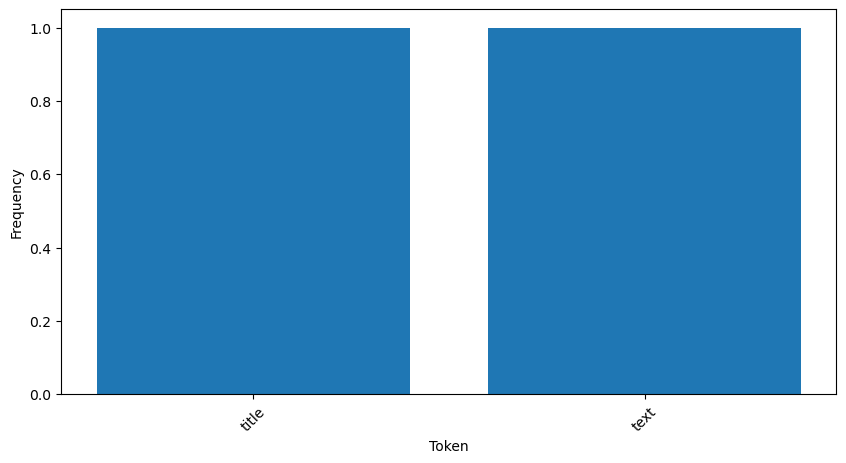

In [90]:
# Displaying the data to get a better understanding. Code taken from LAB4
def top_n_tokens(X, cv, N, plot=True):
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    top_words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:N]

    if plot:
        plt.figure(figsize=(10, 5))
        plt.bar([w[0] for w in top_words_freq], [w[1] for w in top_words_freq])
        plt.xticks(rotation=45)
        plt.xlabel('Token')
        plt.ylabel('Frequency')
        plt.show()
    else:
        return top_words_freq
    
top_n_tokens(
    X= X_train0, 
    cv= vectorizer, 
    N=20
)